# Imports

In [3]:
# NOT ALLOWED THESE LIBRARIES
import pandas as pd
from numba import jit

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
amp_data = np.load('amp_data.npz')['amp_data']

# 1 A

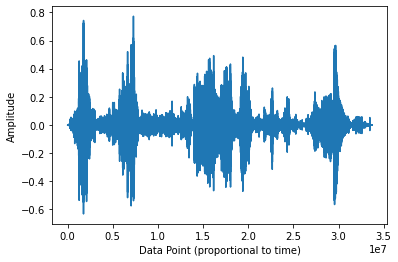

In [6]:
plt.plot(range(len(amp_data)),amp_data)
plt.xlabel("Data Point (proportional to time)")
plt.ylabel("Amplitude")
plt.show()

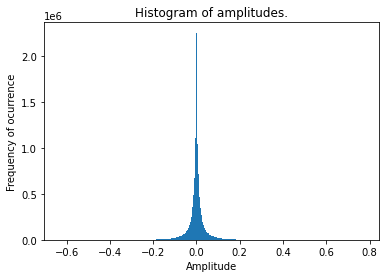

In [12]:
plt.hist(amp_data, bins=1000)
plt.title("Histogram of amplitudes.")
plt.xlabel("Amplitude")
plt.ylabel("Frequency of ocurrence")
plt.show()

# 1 B

In [13]:
amp_data_cut = amp_data[:-6]    # Remove remainder iff div into sets of 21
amp_data_matrix = amp_data_cut.reshape((1605394, 21))   # reshape as Nx21 matrix.

def train_val_test_split(matrix, train_prop = 0.7, val_prop = 0.15, seed=0):
    np.random.seed(seed)
    matrix_shuf = np.random.permutation(matrix)  # shuffle on 1st axis (rows)

    n_rows = matrix_shuf.shape[0]
    #floor non-integer proportions (without math module)
    rows_train = int(n_rows*train_prop)
    rows_val = int(n_rows*val_prop)

    data_train = matrix_shuf[:rows_train,:]
    # Need cumulative partition start and stop.
    start_val, stop_val = rows_train, rows_train + rows_val
    data_val = matrix_shuf[start_val:stop_val,:]
    data_test = matrix_shuf[stop_val:,:]  # rest is test (doesn´t miss dps)

    return data_train, data_val, data_test

amp_data_train, amp_data_val, amp_data_test = train_val_test_split(amp_data_matrix)

# First 20 cols training and 21st col (last) are labels.
X_shuf_train, y_shuf_train = amp_data_train[:,:20], amp_data_train[:,-1:]
X_shuf_val, y_shuf_val = amp_data_val[:,:20], amp_data_val[:,-1:]
X_shuf_test, y_shuf_test = amp_data_test[:,:20], amp_data_test[:,-1:]

# 2 A

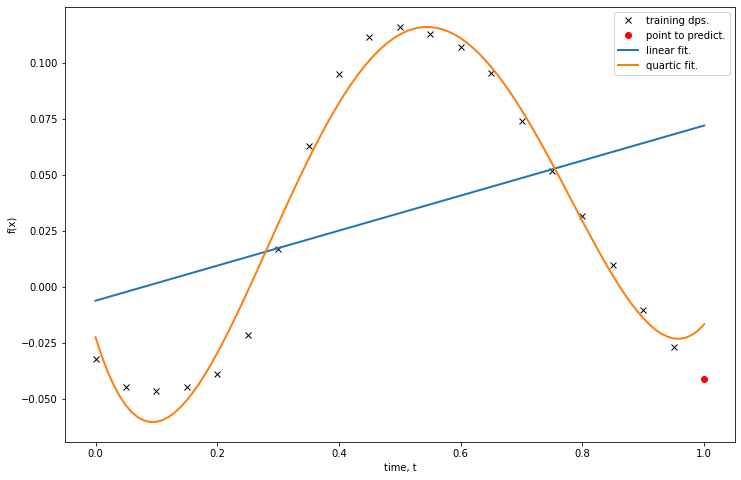

In [14]:
def phi_linear(Xin):
    """Makes design matrix for linear fit. Note: Xin must be 2D."""
    return np.hstack([np.ones(Xin.shape), Xin])  
def phi_quartic(Xin):
    return np.hstack([np.ones(Xin.shape), Xin, Xin**2, Xin**3, Xin**4])

def fit_and_plot(phi_fn, X, yy):
    # phi_fn takes N inputs and returns N,D basis function values
    w_fit = np.linalg.lstsq(phi_fn(X), yy, rcond=None)[0] # D,
    X_grid = np.arange(0, 1.01, 0.01)[:,None] # N,1
    f_grid = np.dot(phi_fn(X_grid), w_fit)
    plt.plot(X_grid, f_grid, linewidth=2)


first_row = (X_shuf_train[0], y_shuf_train[0])  # No need 2D for labels. (1D enough).
# Need 2D array for X, i.e (N,1) for 1D array with N elements.
t_seq = np.arange(0, 1, 1/20).reshape(20,1) 

plt.figure(figsize=(12,8), )
plt.plot(t_seq, first_row[0], "kx")
plt.plot(1, first_row[1], "ro", label="point to predict.")

fit_and_plot(phi_linear, t_seq, first_row[0])
fit_and_plot(phi_quartic, t_seq, first_row[0])
plt.legend(["training dps.", "point to predict.", "linear fit.", "quartic fit."])
plt.xlabel('time, t')
plt.ylabel('f(x)')
plt.show()


# 2 C

def phi_linear(Xin):
    """Makes design matrix for linear fit. Note: Xin must be 2D."""
    return np.hstack([np.ones(Xin.shape), Xin])  
def phi_cubic(Xin):
    return np.hstack([np.ones(Xin.shape), Xin, Xin**2, Xin**3])
def phi_quartic(Xin):
    return np.hstack([np.ones(Xin.shape), Xin, Xin**2, Xin**3, Xin**4])

def fit_and_plot(phi_fn, X, yy):
    # phi_fn takes N inputs and returns N,D basis function values
    w_fit = np.linalg.lstsq(phi_fn(X), yy, rcond=None)[0] # D,
    X_grid = np.arange(0, 1.01, 0.01)[:,None] # N,1
    f_grid = np.dot(phi_fn(X_grid), w_fit)
    plt.plot(X_grid, f_grid, linewidth=2)


first_row = (X_shuf_train[10], y_shuf_train[10])  # No need 2D for labels. (1D enough).
# Need 2D array for X, i.e (N,1) for 1D array with N elements.
t_seq = np.arange(0, 1, 1/20).reshape(20,1) 

plt.figure(figsize=(12,8), )
plt.plot(t_seq, first_row[0], "kx")
plt.plot(1, first_row[1], "ro", label="point to predict.")

fit_and_plot(phi_linear, t_seq, first_row[0])
fit_and_plot(phi_cubic, t_seq, first_row[0])
fit_and_plot(phi_quartic, t_seq, first_row[0])
plt.legend(["training dps.", "point to predict.", "linear fit.", "cubic fit", "quartic fit."])
plt.xlabel('time, t')
plt.ylabel('f(x)')
plt.show()

x_range = np.arange(-2,5, 0.1)
sample_quartic = 10*x_range + -1*x_range**2 + -4*x_range**3 + x_range**4

def phi_linear(Xin):
    """Makes design matrix for linear fit. Note: Xin must be 2D."""
    return np.hstack([np.ones(Xin.shape), Xin])  
def phi_quartic(Xin):
    return np.hstack([np.ones(Xin.shape), Xin, Xin**2, Xin**3, Xin**4])

def fit_and_plot(phi_fn, X, yy):
    # phi_fn takes N inputs and returns N,D basis function values
    w_fit = np.linalg.lstsq(phi_fn(X), yy, rcond=None)[0] # D,
    X_grid = np.arange(-2, 5, 0.01)[:,None] # N,1
    f_grid = np.dot(phi_fn(X_grid), w_fit)
    plt.plot(X_grid, f_grid, linewidth=2)


plt.figure(figsize=(12,8), )
plt.plot(x_range, sample_quartic, "kx")

fit_and_plot(phi_linear, x_range.reshape((70,1)), sample_quartic)
fit_and_plot(phi_quartic,x_range.reshape((70,1)), sample_quartic)
plt.legend(["training dps.", "point to predict.", "linear fit.", "quartic fit."])
plt.xlabel('time, t')
plt.ylabel('f(x)')
plt.show()


# 3 B

## 3B i

In [1]:
def Phi(C,K):
    """
    Construct CxK design matrix representing the C most
    recent time steps before time we wish to predict.
    """
    # Pre construc matrix to raise to. (Powers of t from 0 to K).
    power_matrix = np.tile(np.arange(K), (C, 1))
    start_t = 1-C*(0.05)
    # Use linspace with non-integer steps to avoid rounding errs.
    row_vals = np.linspace(start_t, 1, C, endpoint=False)
    return np.tile(row_vals, (K, 1)).T**power_matrix    #t vals same on row, to power of K.

## 3B ii

In [2]:
def make_vv(C,K):
    """Make vector v from last C dps and with polynomial bfs up to order K-1."""

    def phi_of_t_is_1(K):
        "Polynomial of t=1 is just K ones."
        return np.ones((K, 1))

    phi = phi_of_t_is_1(K)
    phi_matrix = Phi(C,K)
    vv = phi_matrix @ np.linalg.inv(phi_matrix.T @ phi_matrix) @ phi
    return vv

In [5]:
import numpy as np
make_vv(3,5)

array([[ 0.34831125],
       [-3.74889973],
       [ 2.76765909]])

## 3b iii

In [99]:
def phi_linear(Xin):
    """Makes design matrix for linear fit. Note: Xin must be 2D."""
    return np.hstack([np.ones(Xin.shape), Xin])  
def phi_quartic(Xin):
    return np.hstack([np.ones(Xin.shape), Xin, Xin**2, Xin**3, Xin**4])

t_seq = np.arange(0, 1, 1/20).reshape(20,1)
w_fit_linear = np.linalg.lstsq(phi_linear(t_seq), first_row[0], rcond=None)[0]
w_fit_quartic = np.linalg.lstsq(phi_quartic(t_seq), first_row[0], rcond=None)[0]

C = 20
K_linear = 2
K_quartic = 5

print("Prediction from 2, linear fit:", np.dot(phi_linear(np.ones((1,1))), w_fit_linear))
print("Prediction from vv, K=2 fit:", np.dot(make_vv(C, K_linear).T, first_row[0]))
print("Prediction from 2, quartic fit:", np.dot(phi_quartic(np.ones((1,1))), w_fit_quartic))
print("Prediction from vv, K=5 fit:", np.dot(make_vv(C, K_quartic).T, first_row[0]))


Prediction from 2, linear fit: [0.0719272]
Prediction from vv, K=2 fit: [0.0719272]
Prediction from 2, quartic fit: [-0.01682343]
Prediction from vv, K=5 fit: [-0.01682343]


# 3 C

## 3C i

In [98]:
Cs = np.arange(20, 21)
Ks = np.arange(10, 11)

def predict_next(row, vv):
    """Dot v transpose to each row of C last context points."""
    return np.dot(vv.T, row)

best_MSE = np.inf # Dummy MSE to guarantee a better one found.
for C in Cs:
    for K in Ks:
        if C >= K:
            vv = make_vv(C, K)
            # X must also inc. only last C dps.
            # Apply pred to each row containing C context dps.
            predictions = np.apply_along_axis(predict_next, 1, X_shuf_train[:,-C:], vv) # Same dim as y_shuf_train
            MSE_for_CK_chosen = np.mean((predictions - y_shuf_train)**2)
            if MSE_for_CK_chosen < best_MSE:
                # Save winning model params and MSE.
                best_MSE = MSE_for_CK_chosen
                best_model = [(C, K), best_MSE] 

(1123775, 1)
[(20, 10), 0.0010799346943398986]


## 3C ii

In [21]:
def predict_next(row, vv):
    """Dot v transpose to each row of C last context points."""
    return np.dot(vv.T, row)

C, K = 2, 2
vv = make_vv(C, K)
datasets = {"training": {"X" : X_shuf_train, "yy": y_shuf_train},
            "validation": {"X" : X_shuf_val, "yy": y_shuf_val},
            "test": {"X" : X_shuf_test, "yy": y_shuf_test}}
for dataset in datasets:
    predictions = np.apply_along_axis(predict_next, 1, datasets[dataset]["X"][:,-C:], vv) # Same dim as y_shuf_train
    MSE_for_dataset_chosen = np.mean((predictions - datasets[dataset]["yy"])**2)
    print(f"The MSE for the {dataset} dataset is: {MSE_for_dataset_chosen}")

The MSE for the training dataset is: 1.3558151977491836e-05
The MSE for the validation dataset is: 1.3399922207306129e-05
The MSE for the test dataset is: 1.3517653717708395e-05


# 4 A


In [73]:
Cs = np.arange(1,21) 

vv_residual_foreach_C_dict = {}
for C in Cs:
    # lstsq(a,b) solves a@x=b. I.e Xv = yy in our case to find v min SE for train dataset.
    v_fit, residuals, _, _ = np.linalg.lstsq(X_shuf_train[:,-C:], y_shuf_train, rcond=None)
    vv_residual_foreach_C_dict[C] = {"vv" : v_fit, "res" : residuals}

In [79]:
best_MSE = np.inf
for key, values in vv_residual_foreach_C_dict.items():
    MSE = values["res"]/y_shuf_train.shape[0] # Residuals are sum of SE.
    if MSE < best_MSE:
        best_MSE = MSE
        best_context = (key, best_MSE)  # (C, MSE for that C)
print(best_context)

    

(20, array([7.71666757e-06]))


In [81]:
best_MSE = np.inf
for key, values in vv_residual_foreach_C_dict.items():
    MSE = np.mean((y_shuf_val - X_shuf_val[:,-key:] @ values["vv"])**2)  # Residuals are sum of SE.
    if MSE < best_MSE:
        best_MSE = MSE
        best_context = (key, best_MSE)  # (C, MSE for that C)
print(best_context)


(16, 7.688828364116652e-06)


# Q4 B

In [87]:
# Best predictor from Q4 uses C = 16.
C_q4 = 16
vv_q4 = vv_residual_foreach_C_dict[16]["vv"]
MSE_q4_test_set = np.mean((y_shuf_test - X_shuf_test[:,-C_q4:] @ vv_q4)**2)
# Best predictor from Q3 uses C = 2, K=2
C_q3 = 2
K = 2
vv_q3 = make_vv(C_q3, K)
predictions = np.apply_along_axis(predict_next, 1, X_shuf_test[:,-C_q3:], vv_q3) # Same dim as y_shuf_train
MSE_q3_test_set =  np.mean((predictions - y_shuf_test)**2)

print(f"Q4 Predictor´s MSE on test set: {MSE_q4_test_set}")
print(f"Q3 Predictor´s MSE on test set: {MSE_q3_test_set}")

Q4 Predictor´s MSE on test set: 7.942741591582525e-06
Q3 Predictor´s MSE on test set: 1.3517653717708395e-05


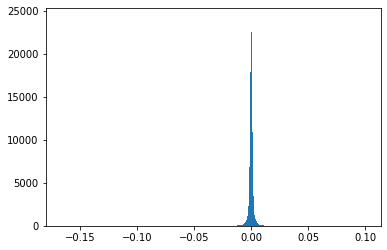

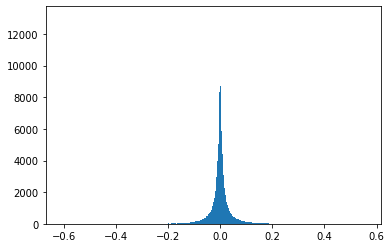

In [101]:
C_q4 = 16
res_best_model_val = (y_shuf_val - X_shuf_val[:,-C_q4:] @ vv_q4)

plt.hist(res_best_model_val, 1000, label="residuals best model")
plt.show()
plt.hist(y_shuf_val - np.zeros(y_shuf_val.shape), 1000, label="residuals all 0")
plt.show()
